In [1]:
import sys

sys.path.append("D:/trailmet/")

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from trailmet.datasets.classification import DatasetFactory

c:\Python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
root_dir = "D:/trailmet/experiments/datasets/"

In [4]:
train_transform = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

val_transform = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

test_transform = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

input_transforms = {
    "train": train_transform,
    "val": val_transform,
    "test": test_transform,
}

target_transforms = {"train": None, "val": None, "test": None}

In [5]:
tcga_dataset = DatasetFactory.create_dataset(
    name="TCGA",
    root=root_dir,
    split_types=["train", "val", "test"],
    val_fraction=0.2,
    kfold=0,
    transform=input_transforms,
    target_transform=target_transforms,
)

TCGA dataset is not present in D:/trailmet/experiments/datasets/. Downloading the dataset


Downloading...
From (uriginal): https://drive.google.com/uc?id=1bnfg9mq-5NwnKjS7ZlVAySooLCTGAjqb
From (redirected): https://drive.google.com/uc?id=1bnfg9mq-5NwnKjS7ZlVAySooLCTGAjqb&confirm=t&uuid=3f1f7142-5b7a-462f-8a45-7e9a7b4221cc
To: D:\trailmet\experiments\datasets\tcga_512.zip
100%|██████████| 3.74G/3.74G [05:01<00:00, 12.4MB/s]
Extracting : 100%|██████████| 10361/10361 [00:26<00:00, 384.19it/s]


Removing the zip file
Done! downloading the dataset.
TCGA split file is not present in D:/trailmet/experiments/datasets/. Downloading the split file


Downloading...
From: https://drive.google.com/uc?id=1xBxLz2iToaHaJJovml7Bf4NcJRS_x2CQ
To: D:\trailmet\experiments\datasets\tcga_512\tcga_lung.zip
100%|██████████| 626k/626k [00:00<00:00, 1.25MB/s]
Extracting : 100%|██████████| 30/30 [00:00<00:00, 854.79it/s]

Removing the zip file
Done! downloading the split files.
Total Training Sample 847
Total Validing Sample 93
Total test Sample 93


In [6]:
print(tcga_dataset["info"])

{'train_size': 847, 'val_size': 93, 'test_size': 93, 'note': ''}


In [7]:
# getting the size of the different splits of the data
print("Train samples: ", tcga_dataset["info"]["train_size"])
print("Val samples: ", tcga_dataset["info"]["val_size"])
print("Test samples: ", tcga_dataset["info"]["test_size"])

Train samples:  847
Val samples:  93
Test samples:  93


In [8]:
# Construct dataloaders
train_loader = torch.utils.data.DataLoader(
    tcga_dataset["train"],
    batch_size=64,
    sampler=tcga_dataset["train_sampler"],
    num_workers=0,
)
val_loader = torch.utils.data.DataLoader(
    tcga_dataset["val"],
    batch_size=64,
    sampler=tcga_dataset["val_sampler"],
    num_workers=0,
)
test_loader = torch.utils.data.DataLoader(
    tcga_dataset["test"],
    batch_size=64,
    sampler=tcga_dataset["test_sampler"],
    num_workers=0,
)

print("No. of training batches: ", len(train_loader))
print("No. of validation batches: ", len(val_loader))
print("No. of test batches: ", len(test_loader))

No. of training batches:  14
No. of validation batches:  2
No. of test batches:  2


Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64, 1])


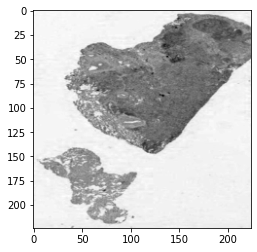

Label: tensor([0])


In [9]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[7, 0, :, :].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")